In [371]:
import pandas as pd
data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)
df.set_index(['CUST_ID'],drop=True,inplace=True)
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 17)


In [372]:
#make a copy for the original dataset
df_copy_scenario1=df.copy()

In [373]:
df_copy_scenario1['CREDIT_LIMIT'].fillna(df_copy_scenario1['CREDIT_LIMIT'].median(),inplace=True)
df_copy_scenario1['MINIMUM_PAYMENTS'].fillna(df_copy_scenario1['MINIMUM_PAYMENTS'].median(),inplace=True)

In [440]:
import numpy as np
import matplotlib.pyplot as plt
class PCA ():

    def __init__(self,n_components,typee ):
        self.n_components = n_components
        self.type=typee
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):
        
        self.mean =np.mean(X,axis=0)
        #self.variance =np.std(X,axis=0)
        X_standarded=(X-self.mean) #/self.variance
        cov_matrix=np.cov(X_standarded.T)
        eign_values,eign_vectors=np.linalg.eig(cov_matrix)
        index=np.argsort(eign_values)[: : -1]
        eign_values_sorted=eign_values[index]
        explained_var_pca=eign_values_sorted/(np.sum(eign_values_sorted))
        self.cum_sum_eignvalues=np.cumsum(explained_var_pca)
        if(self.type=='var'):
                  full_components=eign_vectors[:,index]
                  self.components=full_components[:, 0:self.n_components]
                  self.eign_per_components=eign_values[ 0:self.n_components]
                  X_new=np.dot(X_standarded,self.components)
        else :
            for comp in range(len(self.cum_sum_eignvalues)):
                if(np.round(self.cum_sum_eignvalues[comp],2)>=self.n_components):
                         break
            full_components=eign_vectors[:,index]
            self.components=full_components[:, 0:comp]
            self.eign_per_components=eign_values[ 0:comp]
            X_new=np.dot(X_standarded,self.components)
            
        return X_new

    def transform(self,Z):
        Z_new = (Z - self.mean )#/ self.variance
        Z_new = np.dot(Z_new,self.components)
        return Z_new

    #optional 
    def plot_explained_variance(self):
            eign_values_sorted=self.eign_per_components
            explained_var_pca=[]
            explained_var_pca=eign_values_sorted/(np.sum(eign_values_sorted))
            self.cum_sum_eignvalues=np.cumsum(explained_var_pca)
            plt.step(range(0,len(self.cum_sum_eignvalues)),self.cum_sum_eignvalues, label='Individual explained variance')
            plt.ylabel('Explained variance ratio')
            plt.xlabel('Principal component index')






In [441]:
data=df_copy_scenario1.values
pca_section = PCA(n_components=6,typee='var')
X_transofmed = pca_section.fit(data)
components=pca_section.components#return matrix (n,4)
components.shape

(17, 6)

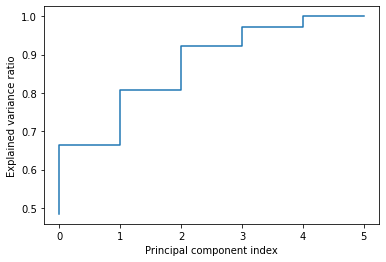

In [442]:
pca_section.plot_explained_variance()

# Using Sklearn

In [443]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
sklearn_pca=pd.DataFrame(pca.fit_transform(df_copy_scenario1))

Text(0.5, 0, 'Principal component index')

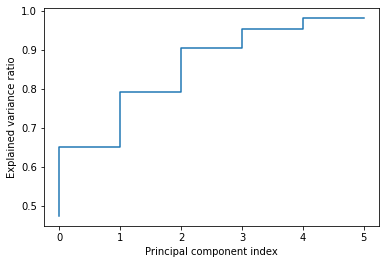

In [444]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.step(range(0,len(cum_sum_eigenvalues)),cum_sum_eigenvalues , label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

# New features

with Sklearn

In [434]:
sklearn_pca

,0,1,2,3,4,5
0,-4324.002588,915.765369,201.300919,-152.755840,55.994474,11.476368
1,4121.337598,-2437.924095,2361.213634,-3923.475700,52.156410,-1450.678890
2,1499.292482,-2001.757145,-2108.969965,1052.205822,-303.964778,391.814398
3,1321.831643,-1387.720046,-2765.240020,1263.137243,-481.335783,-769.277555
4,-3740.724727,751.733688,529.417138,-227.554436,-227.574594,567.760442
...,...,...,...,...,...,...
8945,-4206.224939,1116.548615,154.001330,-177.086740,22.009376,25.094666
8946,-4194.319859,1051.770206,303.267400,12.304289,95.806078,-39.660477
8947,-4377.191354,905.598428,119.007057,-126.825320,-9.461741,-51.744901
8948,-4788.733686,1026.485649,375.798193,-257.111218,-99.313050,-17.538088


With my implemention

In [435]:
pd.DataFrame(X_transofmed)

,0,1,2,3,4,5
0,4324.002588,915.765369,-201.300919,152.755840,55.994474,-11.476368
1,-4121.337598,-2437.924095,-2361.213634,3923.475700,52.156410,1450.678890
2,-1499.292482,-2001.757145,2108.969965,-1052.205822,-303.964778,-391.814398
3,-1321.831643,-1387.720046,2765.240020,-1263.137243,-481.335783,769.277555
4,3740.724727,751.733688,-529.417138,227.554436,-227.574594,-567.760442
...,...,...,...,...,...,...
8945,4206.224939,1116.548615,-154.001330,177.086740,22.009376,-25.094666
8946,4194.319859,1051.770206,-303.267400,-12.304289,95.806078,39.660477
8947,4377.191354,905.598428,-119.007057,126.825320,-9.461741,51.744901
8948,4788.733686,1026.485649,-375.798193,257.111218,-99.313050,17.538088
